In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.core.display import HTML

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### q1:

In [31]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [32]:
data['body_mass_g'].isnull().sum()


2

In [33]:
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True )
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.000000,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.000000,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.000000,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,4201.754386,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,4201.754386,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.000000,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.000000,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.000000,FEMALE


In [34]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           0
sex                  11
dtype: int64

In [35]:
data2 = data.dropna().reset_index()
data2

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [36]:
data2.isnull().sum()

index                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### q2:

##### 2.a:

In [37]:
features = ['bill_length_mm','body_mass_g','bill_depth_mm','flipper_length_mm']

In [38]:
data2.pivot_table(features , index='sex', columns='species', aggfunc='mean') 

bill_depth_mm                       bill_length_mm             \
species        Adelie  Chinstrap     Gentoo         Adelie  Chinstrap   
sex                                                                     
FEMALE      17.621918  17.588235  14.237931      37.257534  46.573529   
MALE        19.072603  19.252941  15.718033      40.390411  51.094118   

                    body_mass_g                           flipper_length_mm  \
species     Gentoo       Adelie    Chinstrap       Gentoo            Adelie   
sex                                                                           
FEMALE   45.563793  3368.835616  3527.205882  4679.741379        187.794521   
MALE     49.473770  4043.493151  3938.970588  5484.836066        192.410959   

                                 
species   Chinstrap      Gentoo  
sex                              
FEMALE   191.735294  212.706897  
MALE     199.911765  221.540984

##### 2.b:

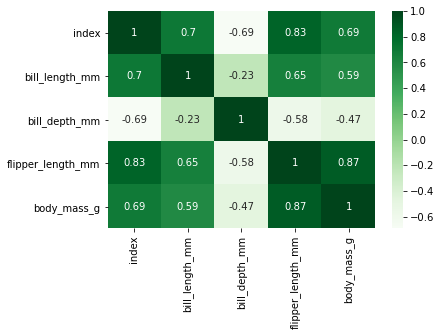

In [39]:
sns.heatmap(data2.corr(),annot=True,cmap='Greens');


##### q3

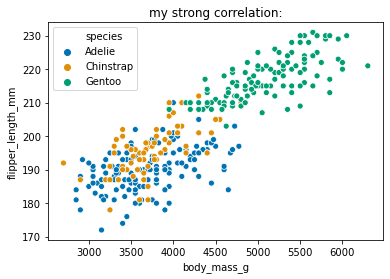

In [40]:
sns.scatterplot(data=data2, x="body_mass_g", y="flipper_length_mm", hue = 'species', palette = 'colorblind');
plt.title('my strong correlation:');

#### q3:

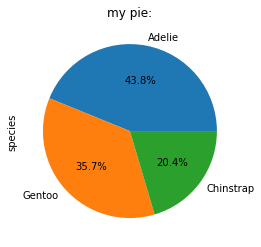

In [41]:
data2['species'].value_counts().plot.pie(autopct="%1.1f%%");
plt.title('my pie:');

#### q4:

In [42]:
data2.groupby('island')[['bill_length_mm','species']].min()

,bill_length_mm,species
island,,
Biscoe,34.5,Adelie
Dream,32.1,Adelie
Torgersen,33.5,Adelie


#### q5:

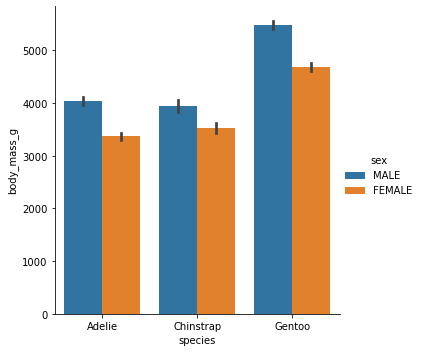

In [43]:
sns.catplot(x="species", y="body_mass_g", hue="sex", kind="bar", data=data2)
plt.show()

#### q6:

##### q6.a:

In [44]:
data2['sex'] =data['sex'].astype('category').cat.codes

In [45]:
data2.dtypes

index                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                     int8
dtype: object

In [46]:
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")
X = data2[['bill_length_mm','body_mass_g','bill_depth_mm','flipper_length_mm','sex']]
y = data2['species']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
X_test.tail()

,bill_length_mm,body_mass_g,bill_depth_mm,flipper_length_mm,sex
39,37.0,3000.0,16.9,185.0,1
117,41.4,3875.0,18.5,202.0,1
78,37.3,3350.0,17.8,191.0,0
127,37.5,4475.0,18.5,199.0,1
138,37.3,3000.0,16.8,192.0,0


##### q6.b:

In [48]:
prediction = model1.predict(X_test)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction,y_test)) 

The accuracy of the Decision Tree is 0.95


##### q6.c:

In [49]:
print("depth:",model1.get_depth())

depth: 5


In [50]:
def get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [51]:
features = ['bill_length_mm', 'body_mass_g', 'bill_depth_mm', 'flipper_length_mm', 'sex']
X = data2[features]
y = data2['species']

In [52]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [53]:
for max_leaf_nodes in [2, 4, 6, 8, 10]:
    my_acc = get_acc(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_acc)

2 0.73
4 0.91
6 0.95
8 0.95
10 0.95


לא נשנה את עומק העץ, אם נקטין את העץ נקטין גם את רמת הדיוק, לעומת אם נגדיל את גודל העץ יישאר אותו הדיוק. 

##### q6.d:

In [56]:
model1.feature_importances_

array([0.35556782, 0.04062233, 0.04087096, 0.55208526, 0.01085362])

In [57]:
feature_importances = pd.DataFrame(model1.feature_importances_,
                                   index = data2.columns[:5],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
bill_length_mm,0.552085
index,0.355568
island,0.040871
species,0.040622
bill_depth_mm,0.010854
